In [13]:
#Importing necessary libraries is the first step of any project
import wordcloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saranya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saranya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saranya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Saranya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Then we move on to the second step i.e. loading the dataset on which we have to have to work and after that convert it into pandas DataFrame from csv format. Now check it with the top five rows.

In [14]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('F:/flip robo intership31/Spam Project/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
#Remove last 3 features 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [18]:
#rename the name 
#df.rename(columns={'v1':'Target','v2':'Text'},inpalce=True)
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3097,ham,This is all just creepy and crazy to me.
2316,ham,That's cause your old. I live to be high.
1081,ham,Can u get pic msgs to your phone?
4140,ham,Beautiful truth : Expression of the face could...
5461,ham,Ok i thk i got it. Then u wan me 2 come now or...


In [19]:
#ham=0,spam=1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [20]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#check missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
#check duplicate
df.duplicated().sum()

403

In [23]:
#remove duplicate
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

# EDA

In [24]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

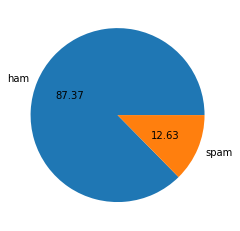

In [25]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:
#Create three more feature 1.no.of alpha,2.no. of words,3.no. of sentence
df['Num_character']=df['text'].apply(len)
df.head()

,target,text,Num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['Num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,Num_character,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['Num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,Num_character,Num_words,Num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot:xlabel='Num_character', ylabel='Count'>

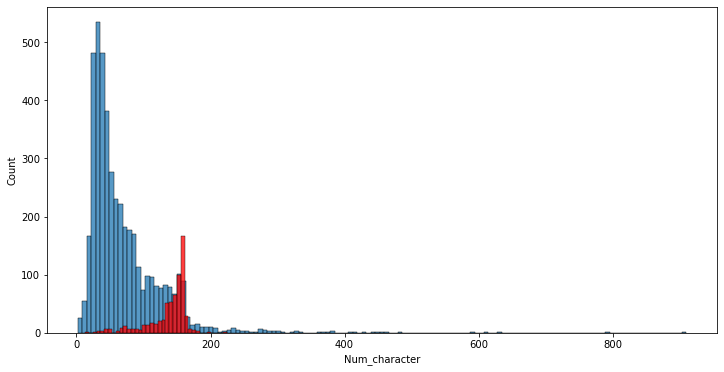

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['Num_character'])
sns.histplot(df[df['target']==1]['Num_character'],color='red')

<AxesSubplot:xlabel='Num_words', ylabel='Count'>

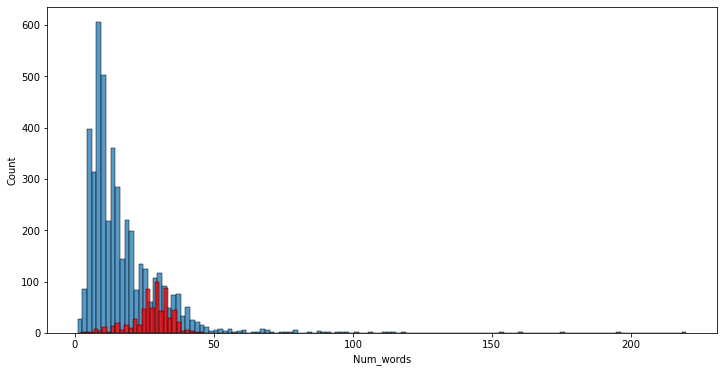

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['Num_words'])
sns.histplot(df[df['target']==1]['Num_words'],color='red')

<AxesSubplot:xlabel='Num_sentence', ylabel='Count'>

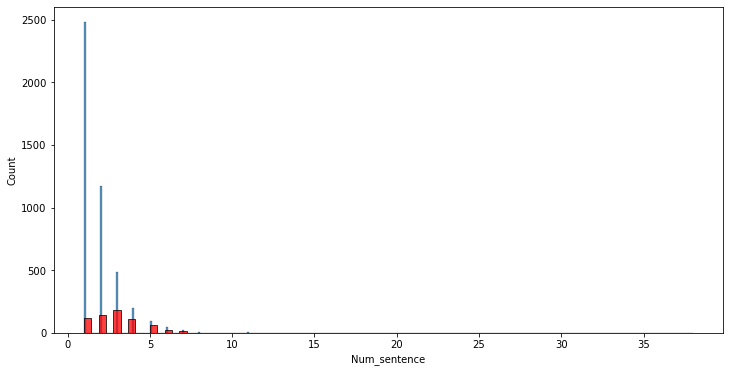

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['Num_sentence'])
sns.histplot(df[df['target']==1]['Num_sentence'],color='red')

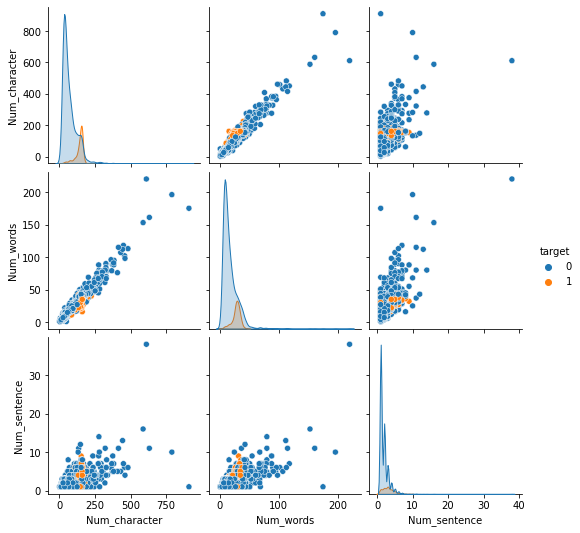

In [32]:
sns.pairplot(df,hue='target')

In [33]:
df.corr()

,target,Num_character,Num_words,Num_sentence
target,1.000000,0.384717,0.262969,0.267602
Num_character,0.384717,1.000000,0.965784,0.626118
Num_words,0.262969,0.965784,1.000000,0.680882
Num_sentence,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

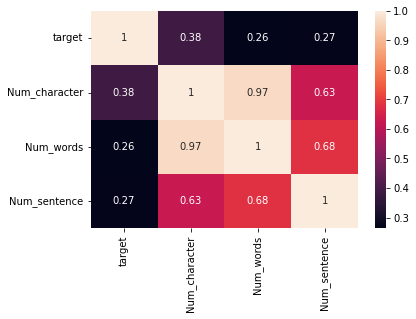

In [34]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

1.lowercase

2.tokenization

3.remove special character

4.removing special words and punctuation

5.stemming

In [35]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [36]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords
import string

In [37]:
#create new feature
df['transformed_text']=df['text'].apply(transform_text)

In [38]:
#find the most used words in botht the cat.
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

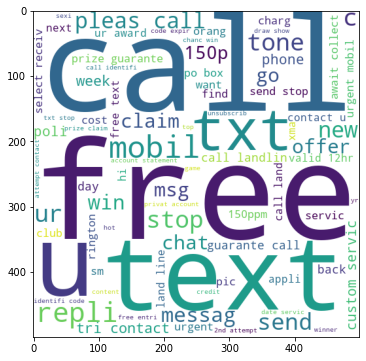

In [39]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

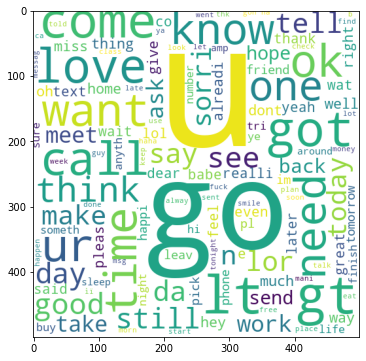

In [40]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# Model Building

In [41]:
#Convert the transformed_text feature into numerical data
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [42]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [43]:
y = df['target'].values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [47]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [48]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [49]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [52]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# Conclusion

The classifier accurately identified the email messages as spam or not spam with 99.2 % accuracy on the test data !